$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
import sklearn.preprocessing

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
train = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/train.csv')
test = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/test.csv')

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_17159/1133452389.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
train.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [6]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

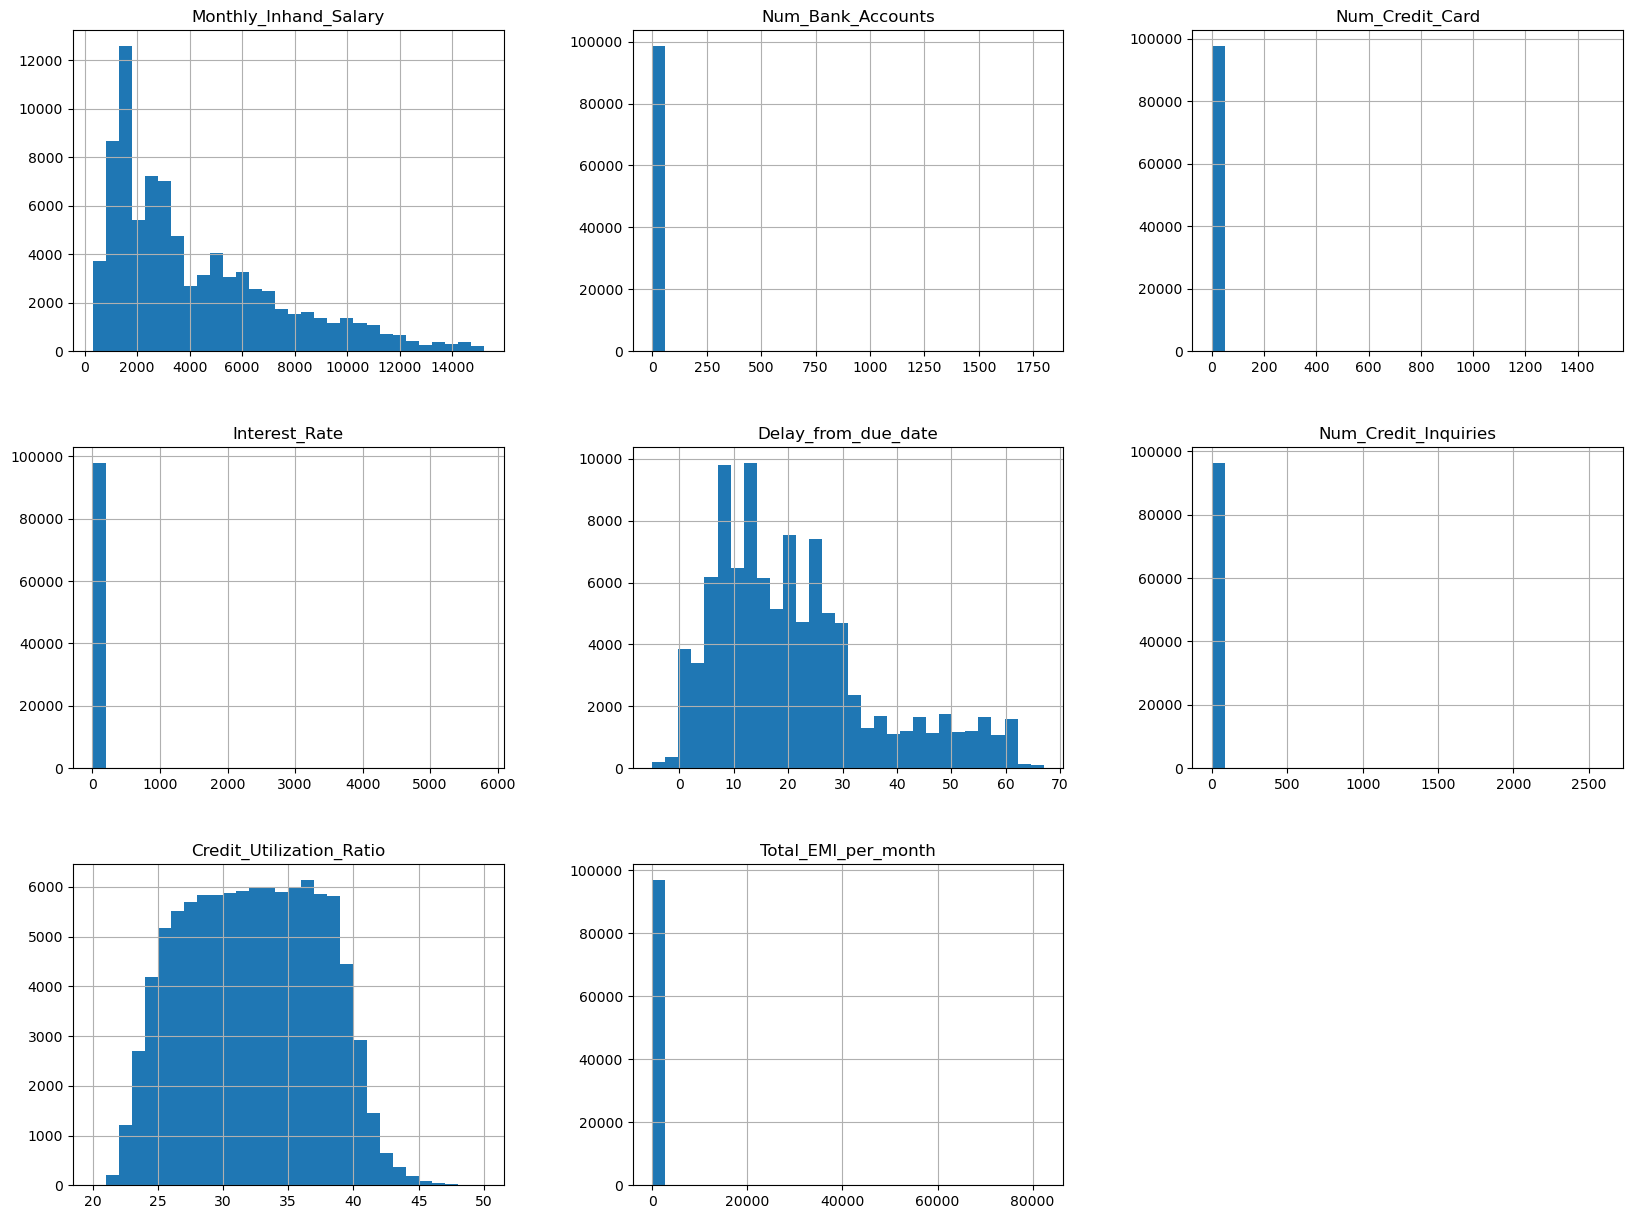

In [8]:
train.hist(bins=30, figsize=(20,15))
plt.show()

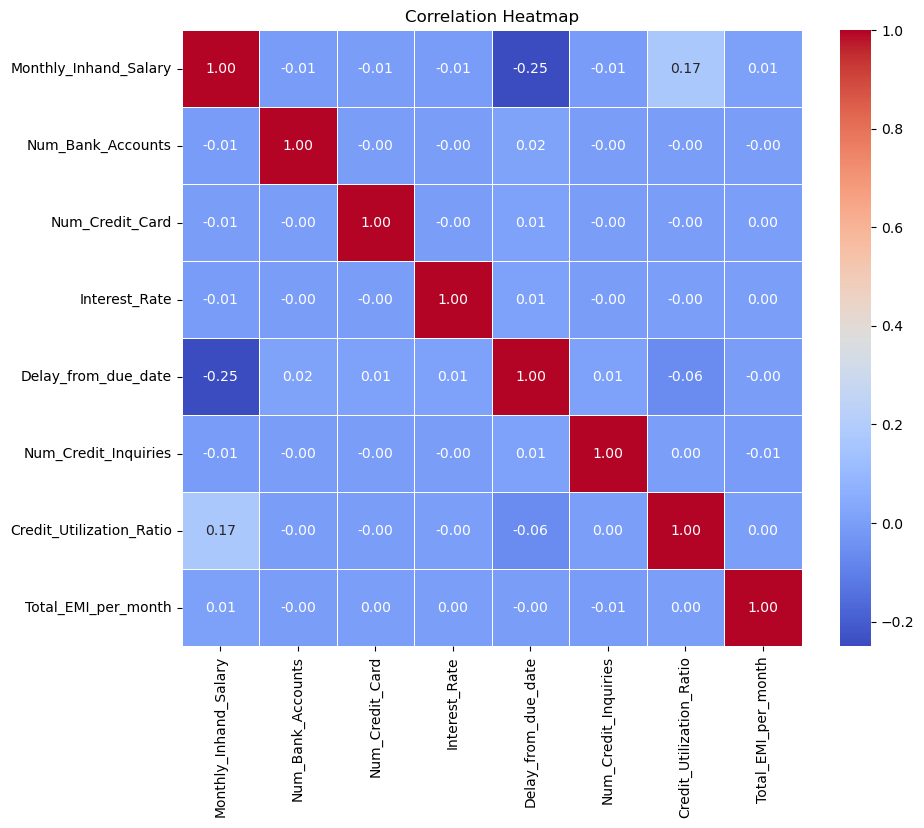

In [9]:
corr_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

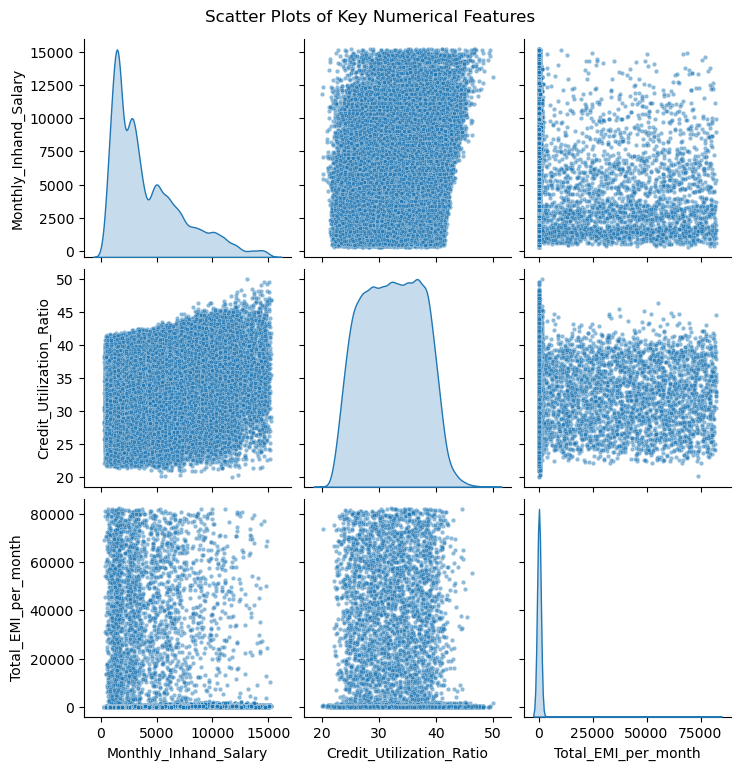

In [11]:
selected_num_cols = ["Monthly_Inhand_Salary","Credit_Utilization_Ratio", "Total_EMI_per_month"]

sns.pairplot(train[selected_num_cols], diag_kind="kde", plot_kws={'alpha':0.5, 's':10})
plt.suptitle("Scatter Plots of Key Numerical Features", y=1.02)
plt.show()


----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [12]:
numeric_cols = ["Annual_Income","Age", "Num_of_Loan", "Outstanding_Debt", "Changed_Credit_Limit", "Monthly_Balance", "Amount_invested_monthly"]
for col in numeric_cols:
    train[col] = pd.to_numeric(train[col], errors='coerce')

# Remove unrealistic values (e.g., negative age)
train = train[train["Age"] > 0]


In [13]:

# Example: Assuming 'Annual_Income' has some strange characters
train['Annual_Income'] = train['Annual_Income'].astype(str)  # Convert to string
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)  # Keep only numbers & dots
train['Annual_Income'] = pd.to_numeric(train['Annual_Income'], errors='coerce')  # Convert back to float


In [14]:
# Missing Values 

train.sort_values(by=['Customer_ID'], inplace=True)
train['Name'] = train.groupby('Customer_ID')['Name'].ffill()

train.sort_values(by=['Annual_Income'], inplace=True)
train['Monthly_Inhand_Salary'] = train.groupby('Annual_Income')['Monthly_Inhand_Salary'].ffill()

In [11]:
train['Monthly_Inhand_Salary'] = train.groupby('Annual_Income')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))


In [13]:
print(train['Monthly_Inhand_Salary'].isnull().sum())  # Should be 0


138


In [16]:
print(train.groupby('Annual_Income')['Monthly_Inhand_Salary'].nunique())


Annual_Income
7.005930e+03    1
7.006035e+03    1
7.006520e+03    1
7.011685e+03    1
7.012310e+03    1
               ..
2.410537e+07    1
2.416001e+07    1
2.417715e+07    1
2.418881e+07    1
2.419806e+07    1
Name: Monthly_Inhand_Salary, Length: 13437, dtype: int64


In [17]:
# Create a mapping dictionary from existing values
income_to_salary_map = train.groupby('Annual_Income')['Monthly_Inhand_Salary'].first().to_dict()

# Fill missing values using the mapping
train['Monthly_Inhand_Salary'] = train['Monthly_Inhand_Salary'].fillna(train['Annual_Income'].map(income_to_salary_map))


In [18]:
print(train['Monthly_Inhand_Salary'].isnull().sum())  # Should be 0


138


In [ ]:
missing_annual_incomes = train[train['Monthly_Inhand_Salary'].isnull()]['Annual_Income'].unique()

print("Annual_Income values for missing Monthly_Inhand_Salary:")
print(missing_annual_incomes)



Annual_Income values for missing Monthly_Inhand_Salary:
[  265962.   433922.   687890.   839284.  1078026.  1200455.  1497612.
  1605533.  1639269.  2101888.  2226279.  2251666.  2460850.  2526215.
  2569167.  2597096.  2716542.  2720806.  3086064.  3561741.  3933159.
  4054075.  4108880.  4156013.  4175074.  4265144.  4546720.  4647209.
  5505619.  5691341.  5794377.  5795888.  5860495.  6397485.  6580687.
  6605051.  6878041.  7235378.  8006694.  8216934.  8311070.  8407524.
  8525194.  8775585.  8800037.  9032145.  9136633.  9296515.  9614255.
  9620915.  9656080. 10001727. 10366883. 10759361. 10799303. 11030668.
 11040265. 11515290. 11712577. 11831701. 11866703. 12468845. 12962224.
 13115381. 13301420. 13365402. 13826843. 14129439. 14336678. 14576351.
 14585775. 14782354. 14954653. 14969275. 15195492. 15211149. 15234744.
 15560525. 15655612. 15655910. 15746977. 15757105. 15847427. 15900012.
 16230069. 16290256. 16328744. 16509983. 16521766. 16644664. 16799876.
 17085468. 17109931. 

In [7]:
train

ID Customer_ID  Month               Name   Age          SSN  \
39675   0xfe79  CUS_0x183d  April             Whiteb  14.0  259-11-0934   
39674   0xfe78  CUS_0x183d  March             Whiteb  14.0  259-11-0934   
39678   0xfe7c  CUS_0x183d   July             Whiteb  14.0  259-11-0934   
39677   0xfe7b  CUS_0x183d   June             Whiteb  14.0  259-11-0934   
39676   0xfe7a  CUS_0x183d    May             Whiteb  14.0  259-11-0934   
...        ...         ...    ...                ...   ...          ...   
27262   0xb5bc  CUS_0x1a23   July       Paige Gancec  51.0  092-81-2077   
14588   0x6b7a  CUS_0x6cad    May              Mattl  38.0    #F%$D@*&8   
59059  0x1700d  CUS_0x5b6f  April          Forgionej  21.0  054-49-7239   
7814    0x43c8  CUS_0xb1a0   July           Wachtelm  17.0  249-90-4145   
48302  0x13104   CUS_0xcfc   July  Catherine Bosleyz  31.0  555-99-1654   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
39675     Writer        7005.93             835.827500                 10   
39674     Writer        7005.93             835.827500                 10   
39678     Writer        7005.93             835.827500                 10   
39677     Writer        7005.93             835.827500                 10   
39676     Writer        7005.93             835.827500                 10   
...          ...            ...                    ...                ...   
27262     Lawyer    24105369.00            3165.787500                  3   
14588    Teacher    24160009.00            3852.982500                 10   
59059   Mechanic    24177153.00            2373.828333                  4   
7814      Lawyer    24188807.00            1067.655833                  8   
48302   Engineer    24198062.00            1135.525417                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
39675  ...    Standard           1703.39                 38.624588   
39674  ...           _           1703.39                 34.595076   
39678  ...    Standard           1703.39                 29.451319   
39677  ...    Standard           1703.39                 38.659613   
39676  ...    Standard           1703.39                 39.513741   
...    ...         ...               ...                       ...   
27262  ...        Good            671.94                 29.621716   
14588  ...         Bad           3148.34                 25.225734   
59059  ...        Good           1443.42                 39.408584   
7814   ...           _           3703.96                 41.268945   
48302  ...        Good            672.49                 34.790192   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
39675   11 Years and 2 Months                    Yes           18.672909   
39674   11 Years and 1 Months                     NM           18.672909   
39678   11 Years and 5 Months                     NM           18.672909   
39677   11 Years and 4 Months                    Yes           18.672909   
39676   11 Years and 3 Months                     NM           18.672909   
...                       ...                    ...                 ...   
27262   31 Years and 4 Months                     No           57.514937   
14588  12 Years and 11 Months                    Yes          196.888046   
59059   21 Years and 2 Months                     No            0.000000   
7814    10 Years and 1 Months                     NM           87.323423   
48302   18 Years and 4 Months                     No           46.388945   

       Amount_invested_monthly                 Payment_Behaviour  \
39675                15.301770  High_spent_Medium_value_payments   
39674                78.151871    Low_spent_Small_value_payments   
39678                26.631010   Low_spent_Medium_value_payments   
39677                47.448284    Low_spent_Small_value_payments   
39676                34.574278    Low_spent_Small_value_payments   
...                     

In [ ]:
train_cleaned = train.drop(columns=['ID','Customer_ID','Name','SSN'])

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

`Bonus:` You can use `solver='saga'` parameter to be able to try the $l_1$ regularization and compare the two.

## `iv` Tuning Hyperparameters

1. Try different `C` values and evaluate. What is the best panalty value?
2. Try training the model while using the `class_weight` parameter and compare the results. Did it affect the model evaluation?
3. You can tune other parameters as you see fit (but make sure you elaborate your reasoning).

`Note:` Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

-----------------------------

# `06` Logistic Regression with Gradient Descent

The `LogisticRegression` class optimizes the model paramters via solvers (e.g., `lbfgs`, `saga`, etc.) instead of using gradient descent.

If we want to train the logistic regression model using gradient descent we can use `SGDClassifier` and tune the parameters almost the same way we did with `SGDRegressor`.

Try this and do hyperparameter tuning if needed to decide which model is better.

`Notes:`
- You will have to set `loss='log_loss'` to use `SGDClassifier` as a logistic regression model.
- The `alpha` parameter is the inverse of the `C` parameter and hence bigger values will result in more regularization.



------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$